# Metrics Review

In [1]:
import re
import os

import mlflow
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
experiment_id = "676815859364563386"

In [3]:
experiment = mlflow.get_experiment(experiment_id)

In [4]:
print(experiment.name)

MLP_Stratified_KFold_log_IC50_2024-10-04-05-27-08


## Load Run Data

In [5]:
df_runs = mlflow.search_runs(
    experiment_ids=[experiment_id]
)

In [6]:
df_runs

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.mape_ic50,metrics.rmse_ic50,metrics.correct_ratio,metrics.rmse_pic50,...,params.is_fps2048_desc170,params.num_layers,params.layer_ratio,params.batch_size,params.is_infomax300,params.dropout_rate,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.source.name,tags.mlflow.runName
0,761ad73471064c9eade6e6e134b170bd,676815859364563386,FINISHED,file:///Users/chunj/projects/Nabi/mlruns/67681...,2024-10-03 21:28:37.739000+00:00,2024-10-03 21:28:45.278000+00:00,503.882660,3530.001953,0.656410,0.704375,...,False,3,0.7953968984683658,64,True,0.3,chunj,LOCAL,/opt/miniconda3/envs/Nabi/lib/python3.12/site-...,trial_29_fold_05
1,44282774b5884247b2c1d7d024f720f9,676815859364563386,FINISHED,file:///Users/chunj/projects/Nabi/mlruns/67681...,2024-10-03 21:28:29.960000+00:00,2024-10-03 21:28:37.738000+00:00,324.481110,1506.938354,0.658974,0.581904,...,False,3,0.7953968984683658,64,True,0.3,chunj,LOCAL,/opt/miniconda3/envs/Nabi/lib/python3.12/site-...,trial_29_fold_04
2,1c041a676dc64c4280ea63c87be3a765,676815859364563386,FINISHED,file:///Users/chunj/projects/Nabi/mlruns/67681...,2024-10-03 21:28:21.549000+00:00,2024-10-03 21:28:29.958000+00:00,318.817230,2360.446045,0.669231,0.611582,...,False,3,0.7953968984683658,64,True,0.3,chunj,LOCAL,/opt/miniconda3/envs/Nabi/lib/python3.12/site-...,trial_29_fold_03
3,f478544e1c1e4efc9388ef103a308e34,676815859364563386,FINISHED,file:///Users/chunj/projects/Nabi/mlruns/67681...,2024-10-03 21:28:14.118000+00:00,2024-10-03 21:28:21.548000+00:00,221.260025,2213.300537,0.649616,0.596152,...,False,3,0.7953968984683658,64,True,0.3,chunj,LOCAL,/opt/miniconda3/envs/Nabi/lib/python3.12/site-...,trial_29_fold_02
4,07763508e9c849d5bbf2df3ac8ce2727,676815859364563386,FINISHED,file:///Users/chunj/projects/Nabi/mlruns/67681...,2024-10-03 21:28:06.251000+00:00,2024-10-03 21:28:14.116000+00:00,354.642853,2987.866943,0.641944,0.660045,...,False,3,0.7953968984683658,64,True,0.3,chunj,LOCAL,/opt/miniconda3/envs/Nabi/lib/python3.12/site-...,trial_29_fold_01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,dd21e23b39d64cd0998c1a7a24d113a4,676815859364563386,FINISHED,file:///Users/chunj/projects/Nabi/mlruns/67681...,2024-10-03 20:27:47.013000+00:00,2024-10-03 20:27:58.293000+00:00,475.871002,3362.719971,0.661538,0.695000,...,False,3,0.7802857225639666,32,True,0.5,chunj,LOCAL,/opt/miniconda3/envs/Nabi/lib/python3.12/site-...,trial_00_fold_05
146,5b4d9a6d272a4dbe807326f9f3805a00,676815859364563386,FINISHED,file:///Users/chunj/projects/Nabi/mlruns/67681...,2024-10-03 20:27:38.746000+00:00,2024-10-03 20:27:47.012000+00:00,315.120575,1490.477417,0.646154,0.582467,...,False,3,0.7802857225639666,32,True,0.5,chunj,LOCAL,/opt/miniconda3/envs/Nabi/lib/python3.12/site-...,trial_00_fold_04
147,7d52a1c0846b4daab845541cc8d7df38,676815859364563386,FINISHED,file:///Users/chunj/projects/Nabi/mlruns/67681...,2024-10-03 20:27:25.748000+00:00,2024-10-03 20:27:38.745000+00:00,343.864380,2427.135010,0.674359,0.608989,...,False,3,0.7802857225639666,32,True,0.5,chunj,LOCAL,/opt/miniconda3/envs/Nabi/lib/python3.12/site-...,trial_00_fold_03
148,4cdce03505a541df824a0579797b5585,676815859364563386,FINISHED,file:///Users/chunj/projects/Nabi/mlruns/67681...,2024-10-03 20:27:17.982000+00:00,2024-10-03 20:27:25.747000+00:00,216.010666,2241.733643,0.664962,0.592425,...,False,3,0.7802857225639666,32,True,0.5,chunj,LOCAL,/opt/miniconda3/envs/Nabi/lib/python3.12/site-...,trial_00_fold_02


## Parameters Recorded

In [7]:
df_params = df_runs.loc[:, df_runs.columns.str.startswith("params.") ]
df_params

,params.learning_rate,params.is_fps2048_desc170,params.num_layers,params.layer_ratio,params.batch_size,params.is_infomax300,params.dropout_rate
0,2.0897261510168036e-05,False,3,0.7953968984683658,64,True,0.3
1,2.0897261510168036e-05,False,3,0.7953968984683658,64,True,0.3
2,2.0897261510168036e-05,False,3,0.7953968984683658,64,True,0.3
3,2.0897261510168036e-05,False,3,0.7953968984683658,64,True,0.3
4,2.0897261510168036e-05,False,3,0.7953968984683658,64,True,0.3
...,...,...,...,...,...,...,...
145,2.9375384576328295e-05,False,3,0.7802857225639666,32,True,0.5
146,2.9375384576328295e-05,False,3,0.7802857225639666,32,True,0.5
147,2.9375384576328295e-05,False,3,0.7802857225639666,32,True,0.5
148,2.9375384576328295e-05,False,3,0.7802857225639666,32,True,0.5


## Metrics Recorded

In [8]:
df_metrics = df_runs.loc[:, df_runs.columns.str.startswith("metrics.") ]
df_metrics

,metrics.mape_ic50,metrics.rmse_ic50,metrics.correct_ratio,metrics.rmse_pic50,metrics.score,metrics.r2_ic50,metrics.nrmse_ic50,metrics.mape_pic50,metrics.r2_pic50
0,503.882660,3530.001953,0.656410,0.704375,0.796087,-0.158935,0.064236,7.197129,0.607645
1,324.481110,1506.938354,0.658974,0.581904,0.798792,0.226100,0.061390,6.040191,0.699957
2,318.817230,2360.446045,0.669231,0.611582,0.795534,0.213388,0.078162,6.392822,0.701814
3,221.260025,2213.300537,0.649616,0.596152,0.788163,0.115291,0.073290,6.355929,0.708571
4,354.642853,2987.866943,0.641944,0.660045,0.785135,-0.042984,0.071674,6.879848,0.656084
...,...,...,...,...,...,...,...,...,...
145,475.871002,3362.719971,0.661538,0.695000,0.800173,-0.051697,0.061192,7.078068,0.618019
146,315.120575,1490.477417,0.646154,0.582467,0.792717,0.242915,0.060719,6.033939,0.699376
147,343.864380,2427.135010,0.674359,0.608989,0.796994,0.168312,0.080370,6.314804,0.704338
148,216.010666,2241.733643,0.664962,0.592425,0.795365,0.092414,0.074231,6.271530,0.712204


## Best Metrics

### Score

In [9]:
ds_best_score = df_runs.loc[df_metrics["metrics.score"].argmax().item()]
ds_best_score

run_id                                        0254aa436a044743a19d9a90f7738819
experiment_id                                               676815859364563386
status                                                                FINISHED
artifact_uri                 file:///Users/chunj/projects/Nabi/mlruns/67681...
start_time                                    2024-10-03 20:37:09.911000+00:00
end_time                                      2024-10-03 20:37:33.826000+00:00
metrics.mape_ic50                                                   332.410675
metrics.rmse_ic50                                                  1282.621094
metrics.correct_ratio                                                      0.7
metrics.rmse_pic50                                                    0.614393
metrics.score                                                         0.823874
metrics.r2_ic50                                                       0.439352
metrics.nrmse_ic50                                  

In [10]:
ds_best_score["tags.mlflow.runName"]

'trial_07_fold_04'

### RMSE IC50

In [11]:
ds_best_rmse_ic50 = df_runs.loc[df_metrics["metrics.rmse_ic50"].argmin().item()]
ds_best_rmse_ic50

run_id                                        0254aa436a044743a19d9a90f7738819
experiment_id                                               676815859364563386
status                                                                FINISHED
artifact_uri                 file:///Users/chunj/projects/Nabi/mlruns/67681...
start_time                                    2024-10-03 20:37:09.911000+00:00
end_time                                      2024-10-03 20:37:33.826000+00:00
metrics.mape_ic50                                                   332.410675
metrics.rmse_ic50                                                  1282.621094
metrics.correct_ratio                                                      0.7
metrics.rmse_pic50                                                    0.614393
metrics.score                                                         0.823874
metrics.r2_ic50                                                       0.439352
metrics.nrmse_ic50                                  

In [12]:
ds_best_rmse_ic50["tags.mlflow.runName"]

'trial_07_fold_04'

### NRMSE IC50

In [13]:
ds_best_nrmse_ic50 = df_runs.loc[df_metrics["metrics.nrmse_ic50"].argmin().item()]
ds_best_nrmse_ic50

run_id                                        0254aa436a044743a19d9a90f7738819
experiment_id                                               676815859364563386
status                                                                FINISHED
artifact_uri                 file:///Users/chunj/projects/Nabi/mlruns/67681...
start_time                                    2024-10-03 20:37:09.911000+00:00
end_time                                      2024-10-03 20:37:33.826000+00:00
metrics.mape_ic50                                                   332.410675
metrics.rmse_ic50                                                  1282.621094
metrics.correct_ratio                                                      0.7
metrics.rmse_pic50                                                    0.614393
metrics.score                                                         0.823874
metrics.r2_ic50                                                       0.439352
metrics.nrmse_ic50                                  

In [14]:
ds_best_nrmse_ic50["tags.mlflow.runName"]

'trial_07_fold_04'

## Compare Two

In [15]:
r1, r2 = "trial_01_fold_01", "trial_07_fold_04"

In [16]:
mask = (r1 == df_runs["tags.mlflow.runName"]) | (r2 == df_runs["tags.mlflow.runName"])

In [17]:
df_compare = df_runs[mask].loc[:, df_runs.columns.str.startswith("metrics.") ].T
df_compare.columns = [r1, r2]
df_compare

,trial_01_fold_01,trial_07_fold_04
metrics.mape_ic50,332.410675,203.627136
metrics.rmse_ic50,1282.621094,2898.772217
metrics.correct_ratio,0.700000,0.670077
metrics.rmse_pic50,0.614393,0.667932
metrics.score,0.823874,0.800270
metrics.r2_ic50,0.439352,0.018290
metrics.nrmse_ic50,0.052251,0.069537
metrics.mape_pic50,6.182501,6.982802
metrics.r2_pic50,0.665518,0.647815


## Check `submit.csv`

In [18]:
r2

'trial_07_fold_04'

In [19]:
match = re.search(r"trial_(\d+)_fold_(\d+)", r2)

In [20]:
trial, fold = int(match.group(1)), int(match.group(2))
print(trial, fold)

7 4


In [21]:
path_submit = os.path.join(experiment.name, f"trial{trial}/fold{fold}.csv")
print(path_submit)

MLP_Stratified_KFold_log_IC50_2024-10-04-05-27-08/trial7/fold4.csv


In [22]:
df_submit = pd.read_csv(path_submit)
df_submit

,ID,IC50_nM
0,TEST_000,207.308990
1,TEST_001,17.576488
2,TEST_002,23.412320
3,TEST_003,67.716870
4,TEST_004,45.156280
...,...,...
108,TEST_108,11.402204
109,TEST_109,7.063308
110,TEST_110,32.437210
111,TEST_111,41.173954


## Visualization

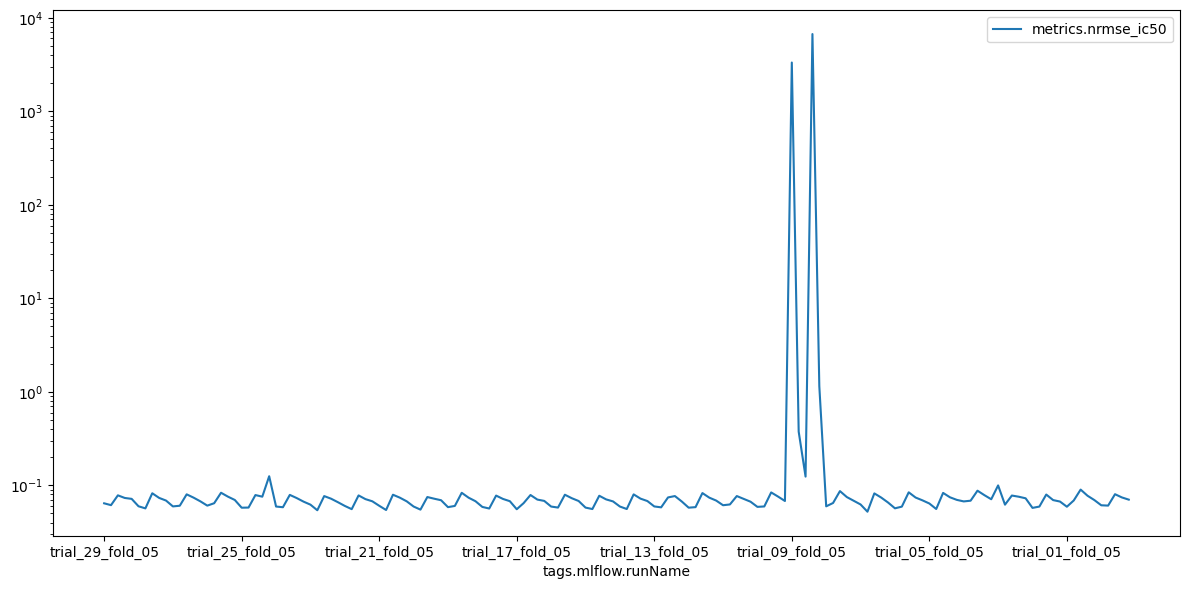

In [23]:
fig, ax = plt.subplots(figsize=(12,6))

df_merged = pd.merge(
    df_runs, df_metrics,
    left_index=True, right_index=True,
    suffixes=("", "_2"),
    how="inner"
)
df_runs.plot(x="tags.mlflow.runName", y="metrics.nrmse_ic50", ax=ax)

plt.yscale("log")
plt.tight_layout()
plt.show()    